Importing Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

Creating the Armed Bandits(Slot Machines) in the casino with some random rewards and winning probabilities

In [24]:
Machines = [[10,0,1,0,5,0,0,1,0,1],
[1,1,1,0,1,5,0,1,0,5],
[0,0,0,0,20,0,0,0,0,1],
[0,0,0,0,0,25,0,0,0,0],
[10,0,0,1,1,0,0,0,0,1]]

Implementing UCB1 Algorithm

In [28]:
N = 200 # We get 1000 coins for $1000 but we spend first 200 exploring and exploiting
d = 5   # Number of Machines
Machine_selected = [] 
Number_of_selections = [0]*d
Sum_of_rewards = [0]*d
total_reward = 0
for n in range(0,N):
  mach = 0
  max_upper_bound = 0
  for i in range(0,d):
    if Number_of_selections[i]>0:
      average_reward = Sum_of_rewards[i] / Number_of_selections[i] #Exploitation
      delta_i = math.sqrt(3/2 * math.log(n + 1) / Number_of_selections[i]) #Exploration
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e40000
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      mach = i
  Machine_selected.append(mach+1)
  Number_of_selections[mach]+=1
  reward = random.choice(Machines[mach])
  Sum_of_rewards[mach]+=reward
  total_reward+=reward


In [31]:
print(Sum_of_rewards)
print(total_reward) #Profit made

[4, 264, 0, 0, 3]
271


Visualizing Results in Histogram

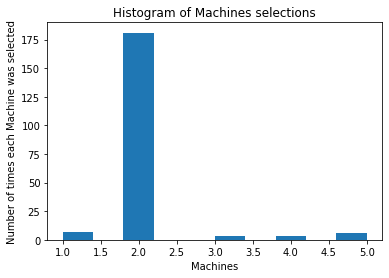

In [30]:
plt.hist(Machine_selected)
plt.title('Histogram of Machine selections')
plt.xlabel('Machines')
plt.ylabel('Number of times each Machine was selected')
plt.show()